In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
%aimport caplib
from caplib import show, clusterize, load_random_img
import caplib

In [4]:
import cv2
import math
from matplotlib import pyplot as plt
import numpy as np
from itertools import filterfalse
from functools import reduce
# from functools import partial
from operator import add
# is_not_none = partial(is_not, None)

In [115]:
def filter_comp_count(img):
    c2 = cv2.connectedComponentsWithStats(morph(img))[0]
    return 1 < c2 <= 10

# def erod(img):
#     return cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))


def morph(img):
    c_erode = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    c_erode = cv2.morphologyEx(c_erode, cv2.MORPH_DILATE, 
                               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,6)))
    return c_erode


def try_collect_letters(img):
    c_m = morph(img)
    return caplib.fund_cont_subsec(caplib.get_hist(c_m))
    

def non_zero_seq(img):
    int_len = lambda t: t[1] - t[0]
    s = try_collect_letters(img)
    # s = filter(lambda t: int_len(t) >= 10, s)
    # s = list(s)
    # if len(s) == 0:
    #     return False
    # if len(s) > 10:
    #     return False
    if any(map(lambda t: int_len(t) < 10, s)):
        return False
    if any(map(lambda t: int_len(t) > 50, s)):
        return False
    return True

67


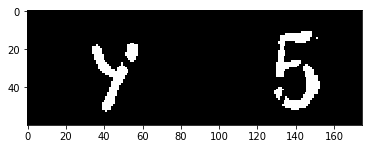

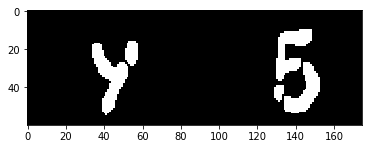

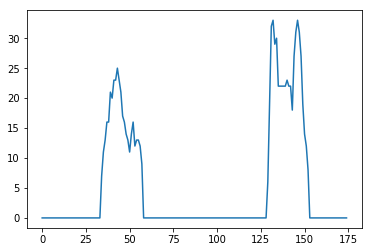

[(34, 57), (129, 152)]


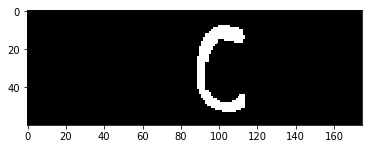

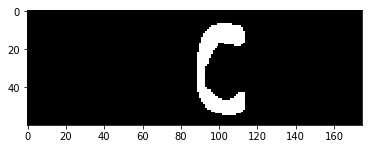

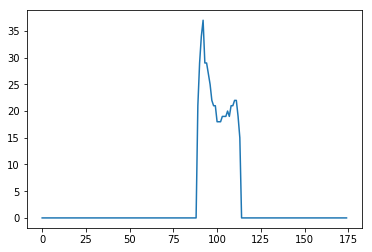

[(89, 113)]


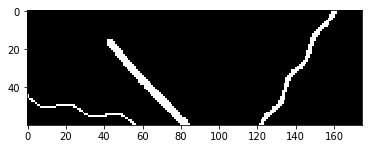

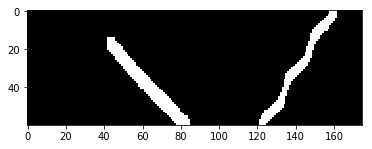

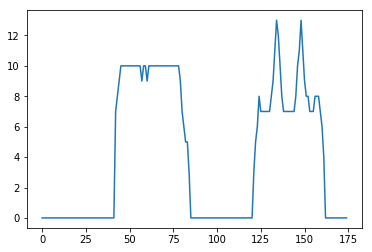

[(42, 84), (121, 161)]


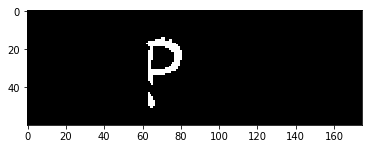

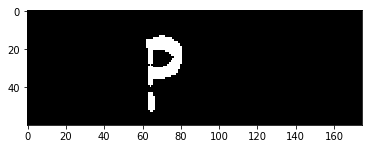

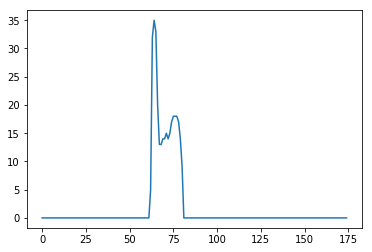

[(62, 80)]


In [117]:
(fname,img) = load_random_img()
print(fname)
clusters = map(caplib.simple_bin, clusterize(img))
clusters = filter(filter_comp_count, clusters)
clusters = filter(non_zero_seq, clusters)
clusters = list(clusters)

for c in clusters:
    # c_m = morph(c)
    show(c)
    inter = try_collect_letters(c)
    
    # show(c_m)
    # plt.plot(caplib.get_hist(c_m))
    # plt.show()
    # print(caplib.fund_cont_subsec(caplib.get_hist(c_m)))
    # print(cv2.connectedComponentsWithStats(c_m)[0])

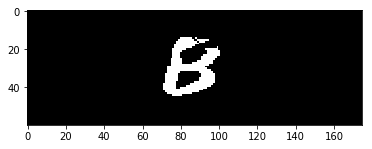

'B'

In [111]:
x = clusters[0]
# _,x = caplib.crop_erode(x)
show(x)
caplib.recognize(x)